500
500


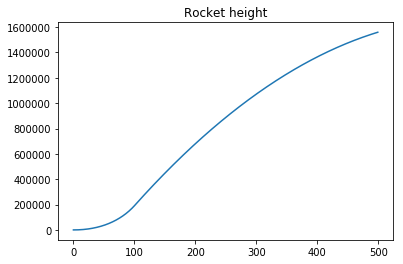

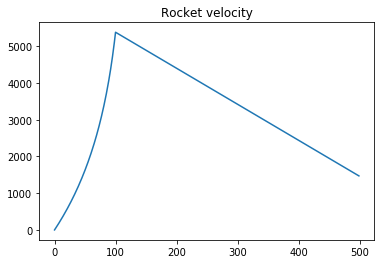

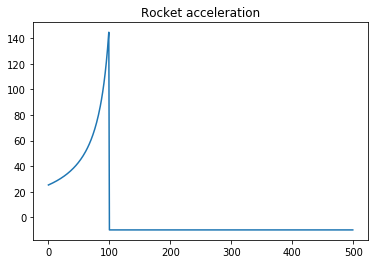

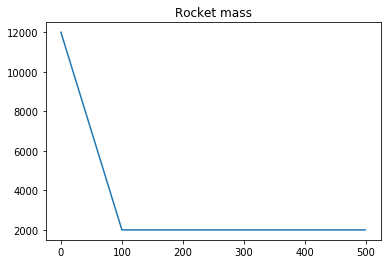

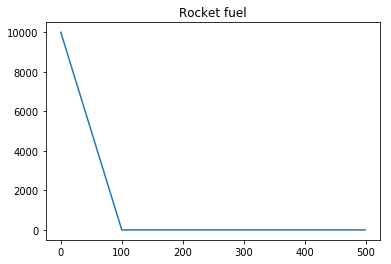

In [1]:
import math
import matplotlib.pyplot as plt
%matplotlib inline

fuel_burned_per_second = 100
max_fuel = 10000
m_empty = 2000

def m(t):
    return m_empty + m_fuel(t)

def m_fuel(t):
    return max(max_fuel - t * fuel_burned_per_second, 0)

#v = v0 + u*ln(m0/m) - gt
isp = 310
g = -9.8

Veq = isp * g
def du(t):
    if m_fuel(t) > 0: 
        return -Veq * fuel_burned_per_second / m(t) 
    else: 
        return g

#Cd = 1.28
#A = 

#Fd = 0.5 * p * v**2 * Cd * A
    
time_range = [t for t in range(500)]
fuel_range = [max(a, 0) for a in range(10000, -40000, -100)]
mass_range = [m(time) for time in time_range]
acceleration_range = [du(time) for time in time_range]
velocity_range = [sum(acceleration_range[:n]) for n in range(len(acceleration_range))]
position_range = [sum(velocity_range[:n]) for n in range(len(velocity_range))]

print(len(time_range))
print(len(position_range))
#fig3 = plt.figure()
#ax3 = fig3.add_subplot(111)
plt.title("Rocket height"); 
plt.plot(time_range, position_range)
plt.figure()
plt.title("Rocket velocity"); 
plt.plot(time_range, velocity_range)
plt.figure()
plt.title("Rocket acceleration"); 
plt.plot(time_range, acceleration_range)
plt.figure()
plt.title("Rocket mass"); 
plt.plot(time_range, mass_range)
plt.figure()
plt.title("Rocket fuel"); 
plt.plot(time_range, fuel_range)

#def v(t):
#    if t == 0:
#        return 0
#    else:
#        v = u * math.log(m + max_fuel / m)
#        return v + v(t-1)
    
#v(t) = v(t-1)



v0 = 0
u = -310


